In [67]:
import pandas as pd
import numpy as np
from google.colab import files
upload = files.upload()

Saving UCI_ML_epilepsy.csv to UCI_ML_epilepsy (1).csv


In [68]:
seizure = pd.read_csv("UCI_ML_epilepsy.csv")
seizure.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [69]:
seizure.shape

(11500, 180)

In [70]:
seizure["OUTPUT_LABEL"] = seizure.y == 1
seizure["OUTPUT_LABEL"] = seizure["OUTPUT_LABEL"].astype(int)
seizure.pop('y')
seizure.drop(seizure.columns[0], axis=1, inplace=True)

In [71]:
seizure

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [72]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class: %.3f"
    % calc_prevalence(seizure["OUTPUT_LABEL"].values)
)

prevalence of the positive class: 0.200


In [73]:
seizure['OUTPUT_LABEL'].value_counts()

0    9200
1    2300
Name: OUTPUT_LABEL, dtype: int64

In [74]:
#checking for na values
seizure.isna().sum().any()

False

In [75]:
seizure.shape

(11500, 179)

In [76]:
X = seizure.drop(columns="OUTPUT_LABEL")
target = seizure["OUTPUT_LABEL"]

In [77]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Checking for feature importance

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

fi_x = seizure.drop(columns="OUTPUT_LABEL")
fi_y = seizure["OUTPUT_LABEL"]

rf_model = RandomForestRegressor()
rf_model.fit(fi_x,fi_y)

RandomForestRegressor()

In [79]:
plt.rcParams.update({'figure.figsize': (50, 100)})
plt.rcParams.update({'font.size': 20})

Text(0.5, 0, 'Random Forest Feature Importance')

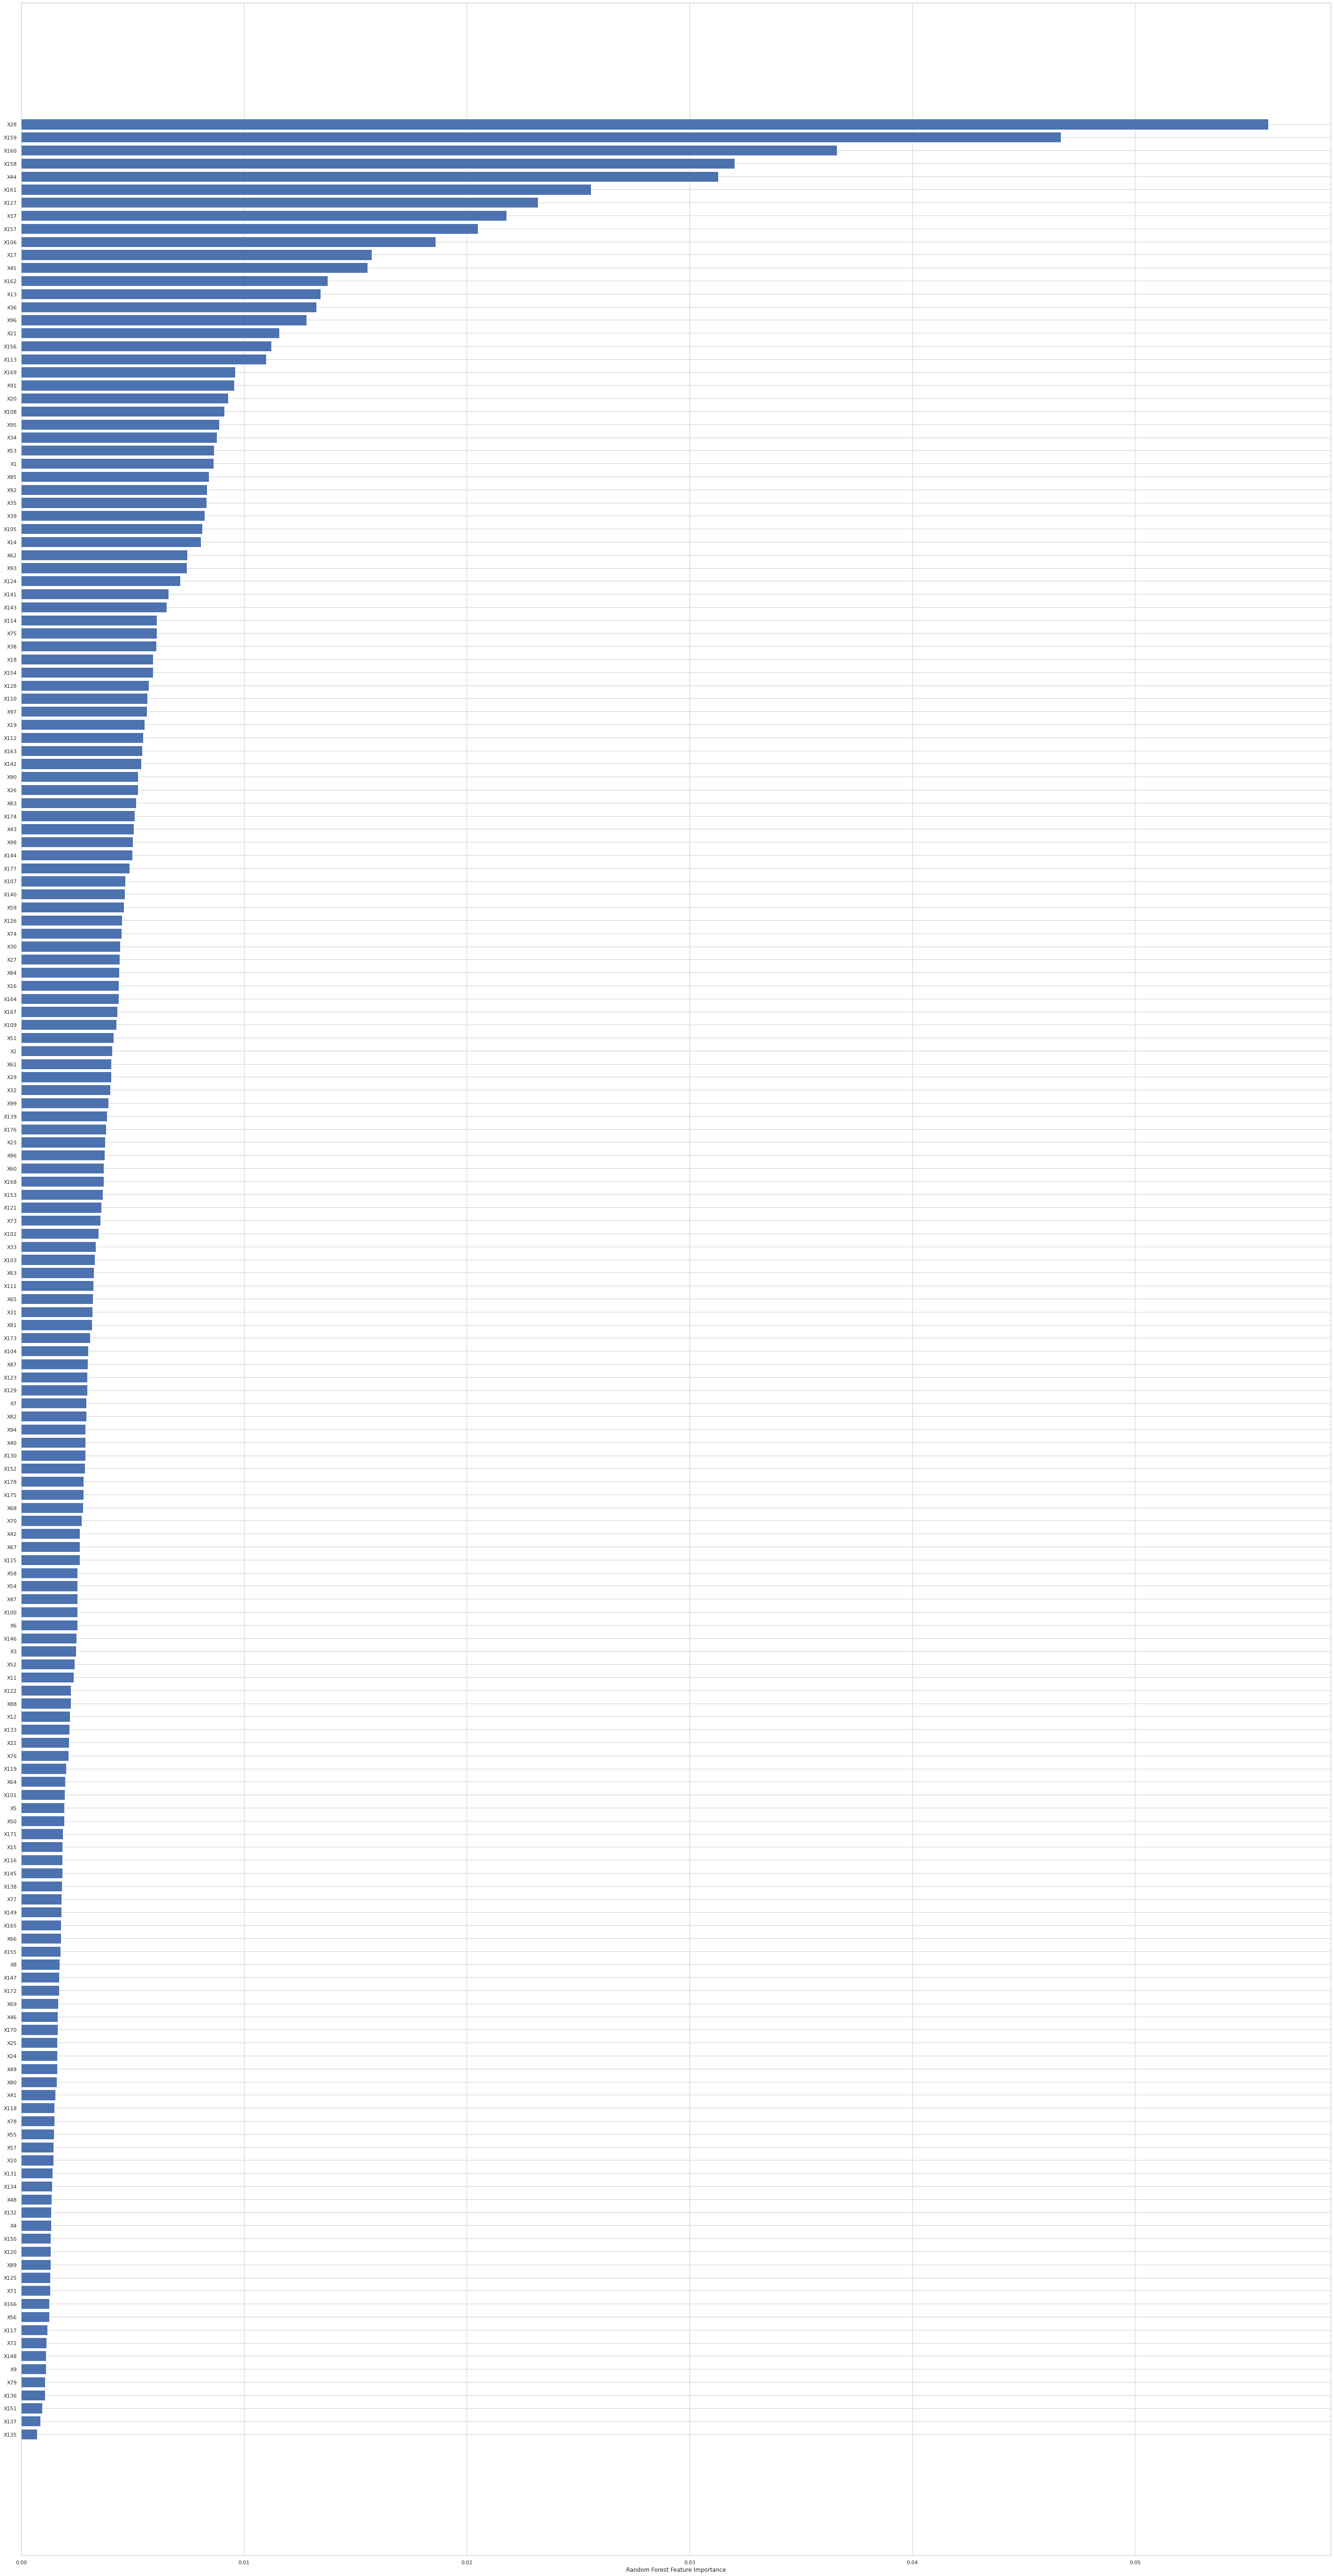

In [80]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(seizure.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
important_features_dict = {}
for idx, val in enumerate(rf_model.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'top most important features: {important_features_list[:100]}')

top most important features: [27, 158, 157, 159, 156, 160, 43, 105, 126, 16, 44, 91, 94, 161, 37, 112, 17, 104, 110, 90, 26, 20, 168, 95, 169, 107, 89, 155, 127, 151, 140, 52, 10, 82, 61, 84, 19, 113, 85, 12, 30, 167, 15, 162, 28, 111, 122, 142, 13, 36, 106, 31, 152, 0, 123, 34, 92, 96, 51, 97, 173, 38, 59, 74, 58, 109, 35, 102, 174, 153, 108, 83, 93, 22, 139, 143, 60, 163, 172, 165, 29, 32, 86, 98, 154, 138, 76, 45, 176, 166, 99, 66, 101, 1, 137, 50, 144, 53, 177, 164]


In [ ]:
perm_importance = permutation_importance(rf_model, fi_x, fi_y)

Text(0.5, 0, 'Permutation Importance')

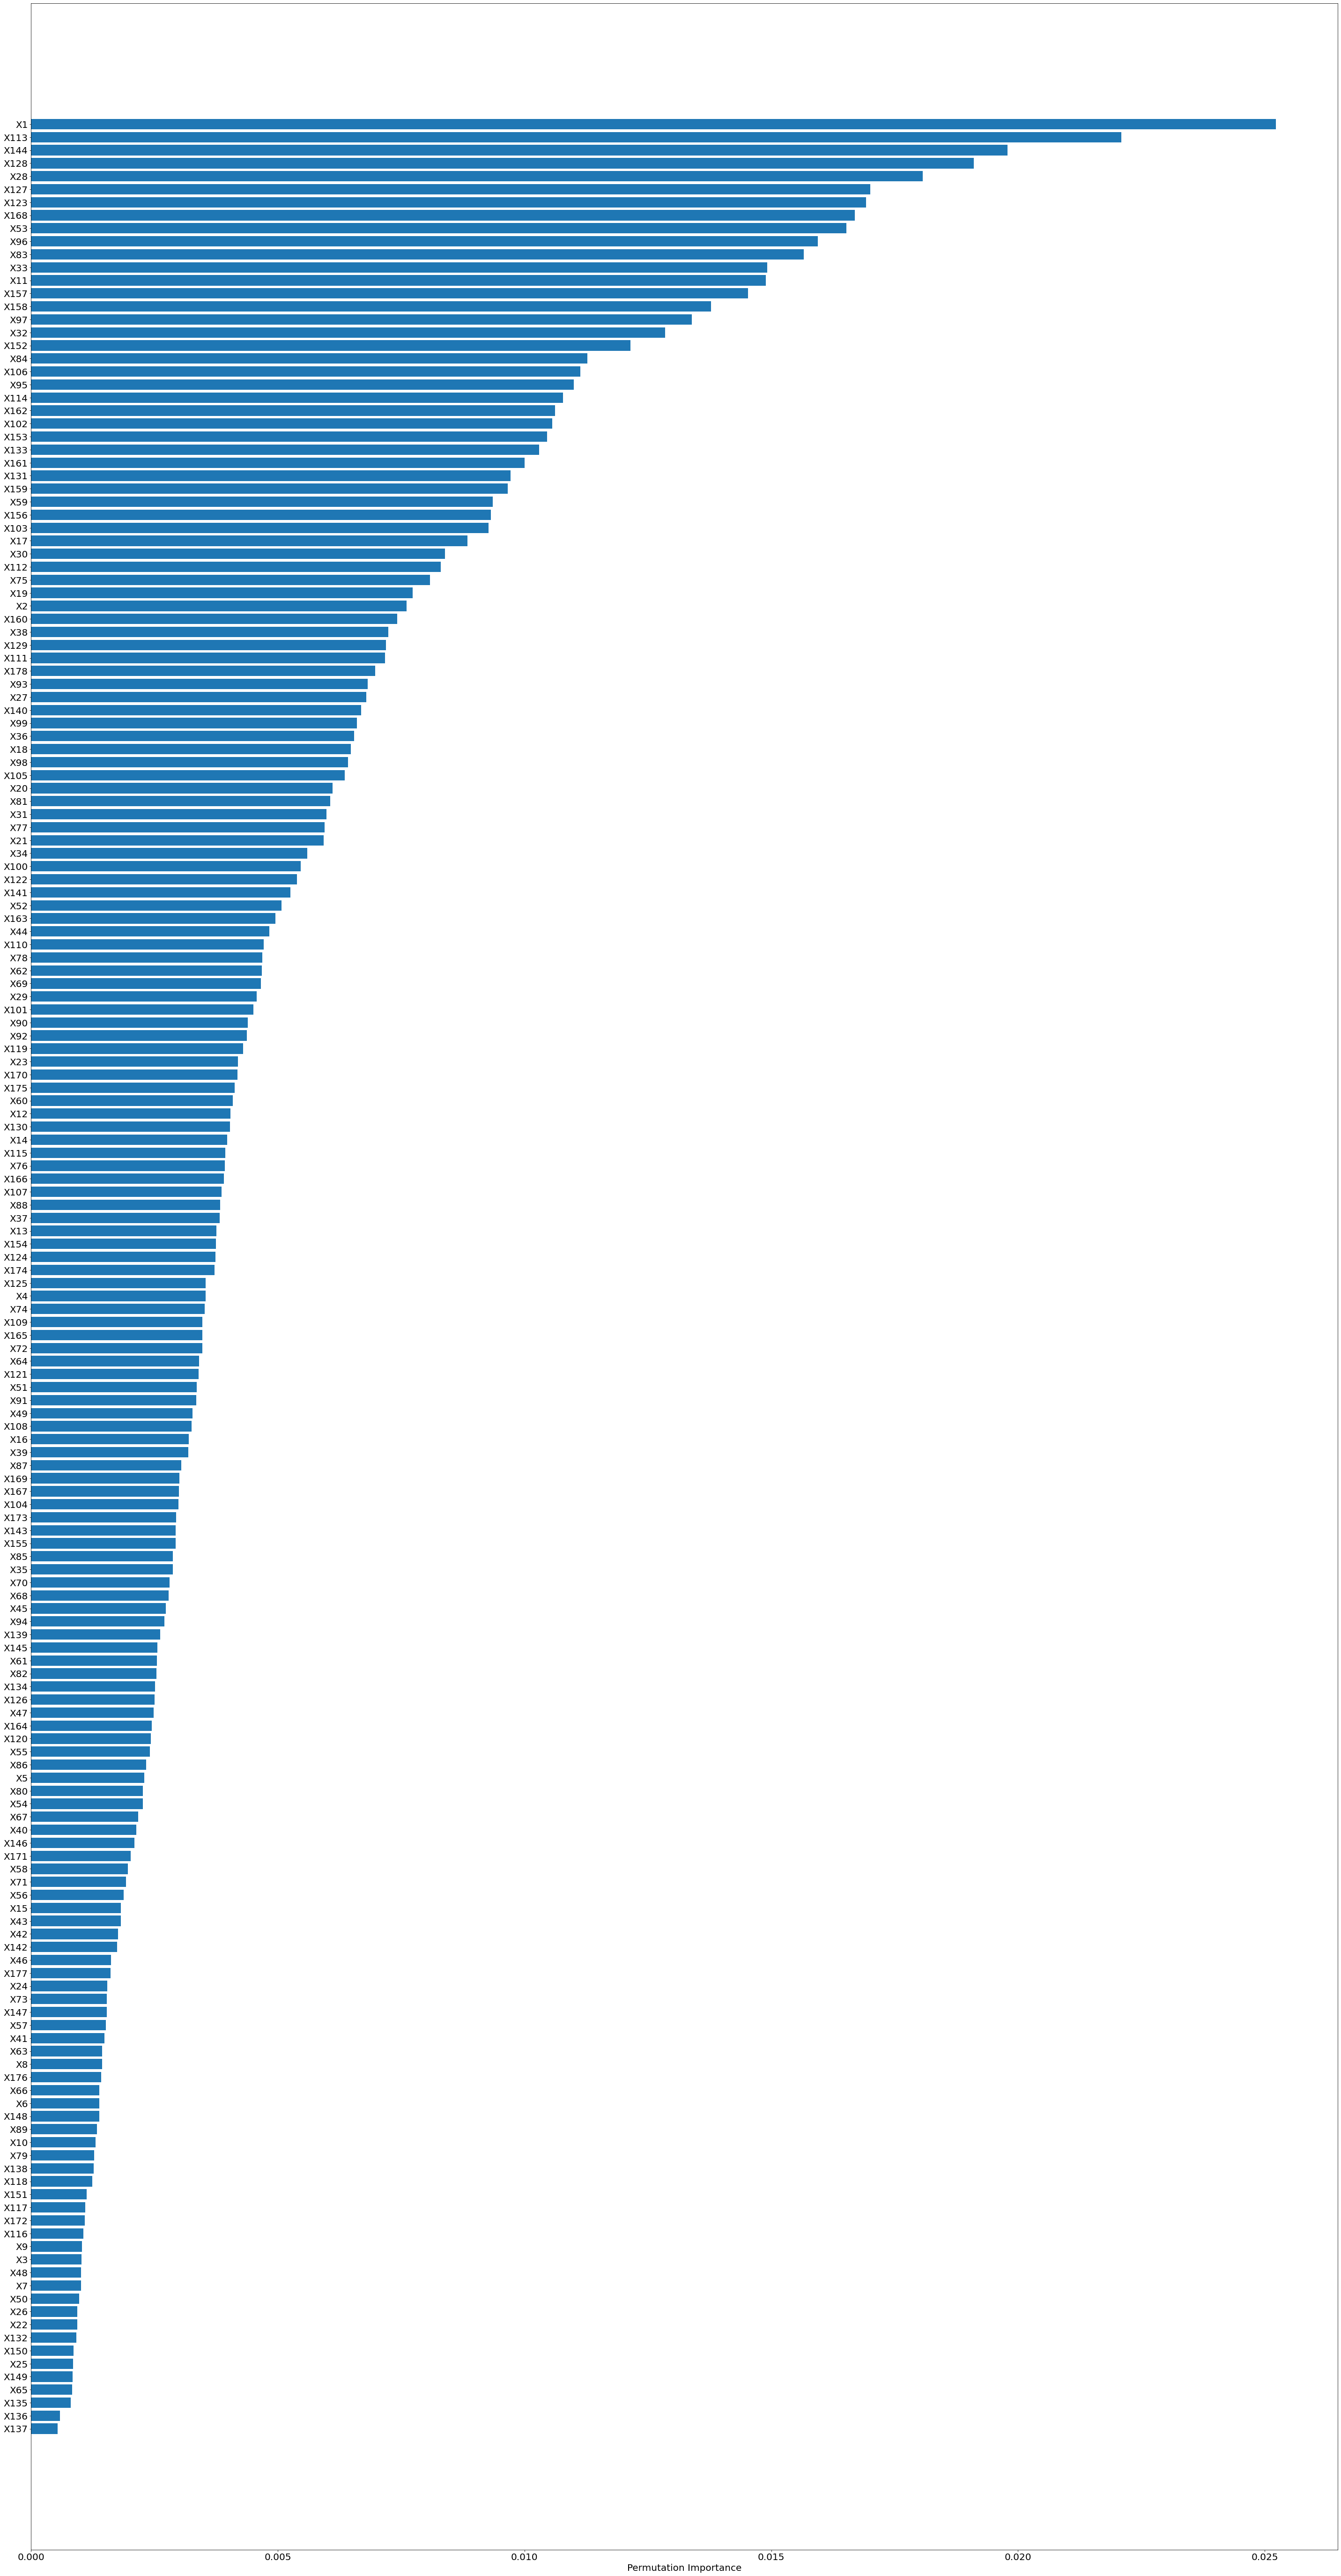

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(seizure.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
important_features_dict_perm = {}
for idx, val in enumerate(perm_importance):
    important_features_dict_perm[idx] = val

important_features_list_perm = sorted(important_features_dict_perm,
                                 key=important_features_dict_perm.get,
                                 reverse=True)

print(f'top important features: {important_features_list[:100]}')

top important features: [27, 158, 157, 159, 156, 160, 43, 105, 126, 16, 44, 91, 94, 161, 37, 112, 17, 104, 110, 90, 26, 20, 168, 95, 169, 107, 89, 155, 127, 151, 140, 52, 10, 82, 61, 84, 19, 113, 85, 12, 30, 167, 15, 162, 28, 111, 122, 142, 13, 36, 106, 31, 152, 0, 123, 34, 92, 96, 51, 97, 173, 38, 59, 74, 58, 109, 35, 102, 174, 153, 108, 83, 93, 22, 139, 143, 60, 163, 172, 165, 29, 32, 86, 98, 154, 138, 76, 45, 176, 166, 99, 66, 101, 1, 137, 50, 144, 53, 177, 164]


Training/validation/test samples

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(X,target,random_state =0, test_size=0.3)
#The random_state is a pseudo-random number parameter that allows you to reproduce
# the same train test split each time you run the code. 

In [ ]:
print(
    "Test prevalence(n = %d):%.3f"
    % (len(y_test), calc_prevalence(y_test))
)

print(
    "Train all prevalence(n = %d):%.3f"
    % (len(y_train), calc_prevalence(y_train))
)

Test prevalence(n = 3450):0.200
Train all prevalence(n = 8050):0.200


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    f1 = f1_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    #sensitivity = sensitivity_score(y_actual,y_pred)
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('F1 Score:%.3f'%f1)    
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('accuracy:%.3f'%accuracy)
    print(' ')
    return f1, recall, precision, specificity, accuracy

In [ ]:
thresh = 0.5 

In [ ]:
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(confmat):

    # this creates the matplotlib graph to make the confmat look nicer
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
       
    # change the labels
    ax.set_xticklabels(['']+['NotSeizure', 'Seizure'])
    ax.set_yticklabels(['']+['NotSeizure', 'Seizure'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ax.xaxis.set_label_position('top')

    plt.tight_layout()
    
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(x_train)

# transform our data matrices
X_train_tf = scaler.transform(x_train)
X_test_tf = scaler.transform(x_test)

In [ ]:
print('Before Scaling')
display(x_train.head())

print('After StandardScaler')
display(pd.DataFrame(X_train_tf).head())

Before Scaling


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
4075,19,33,44,54,61,56,56,26,10,-5,...,-32,-12,12,17,24,25,29,46,69,80
10104,-81,-74,-40,31,99,107,101,76,15,-41,...,-34,-19,-5,-18,-50,-49,-40,-51,-51,-14
5501,-58,-57,-57,-59,-60,-68,-66,-68,-68,-67,...,-6,0,4,2,7,8,2,-1,-6,-9
7779,-99,-74,-75,-107,-192,-286,-369,-405,-406,-420,...,-322,-216,-134,-55,44,139,179,173,190,313
3402,-98,-93,-78,-68,-56,-68,-89,-103,-118,-120,...,-79,-58,-19,3,15,4,-16,-23,-32,-24


After StandardScaler


,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.180516,0.261222,0.328377,0.387331,0.423259,0.386025,0.381028,0.196101,0.098948,0.004830,...,-0.134132,-0.007017,0.145871,0.181434,0.224504,0.228006,0.253275,0.356296,0.492708,0.553767
1,-0.407605,-0.372221,-0.180769,0.245441,0.658190,0.701225,0.656972,0.499230,0.129407,-0.220259,...,-0.146101,-0.048971,0.045098,-0.023374,-0.209754,-0.213277,-0.169967,-0.244883,-0.245557,-0.018815
2,-0.272337,-0.271581,-0.283811,-0.309781,-0.324808,-0.380343,-0.367089,-0.373781,-0.376205,-0.382823,...,0.021460,0.064906,0.098449,0.093659,0.124742,0.126630,0.087658,0.065003,0.031292,0.011642
3,-0.513467,-0.372221,-0.392914,-0.605899,-1.140882,-1.727668,-2.225116,-2.416867,-2.435204,-2.589941,...,-1.869591,-1.229702,-0.719587,-0.239886,0.341871,0.907820,1.173366,1.143406,1.237125,1.973038
4,-0.507586,-0.484702,-0.411098,-0.365303,-0.300079,-0.380343,-0.508127,-0.585971,-0.680791,-0.714203,...,-0.415396,-0.282720,-0.037891,0.099511,0.171689,0.102777,-0.022753,-0.071347,-0.128665,-0.079728


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_tf,y_train)
y_train_preds = dt.predict(X_train_tf)
y_valid_preds = dt.predict(X_test_tf)
#Accuracy
#classifier.score(X_test_tf, y_test)

print("After scaling")
print('Decision Tree')
print("Training:")
dt_train_f1, dt_train_recall,dt_train_precision,  \
    dt_train_specificity, dt_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
dt_valid_f1, dt_valid_recall,dt_valid_precision,  \
    dt_valid_specificity, dt_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

After scaling
Decision Tree
Training:
F1 Score:1.000
recall:1.000
precision:1.000
specificity:1.000
accuracy:1.000
 
Validation:
F1 Score:0.849
recall:0.825
precision:0.874
specificity:0.970
accuracy:0.941
 


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random =random.fit(x_train, y_train)
y_train_preds = random.predict(x_train)
y_valid_preds = random.predict(x_test)

print("Before ")
print('Random Forest')
print("Training:")
random_train_f1, random_train_recall,random_train_precision,  \
    random_train_specificity, random_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
random_valid_f1, random_valid_recall,random_valid_precision,  \
    random_valid_specificity, random_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

Before 
Random Forest
Training:
F1 Score:1.000
recall:1.000
precision:1.000
specificity:1.000
accuracy:1.000
 
Validation:
F1 Score:0.941
recall:0.931
precision:0.951
specificity:0.988
accuracy:0.977
 


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random =random.fit(X_train_tf, y_train)
y_train_preds = random.predict(X_train_tf)
y_valid_preds = random.predict(X_test_tf)

print("AFter")
print('Random Forest')
print("Training:")
random_train_f1, random_train_recall,random_train_precision,  \
    random_train_specificity, random_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
random_valid_f1, random_valid_recall,random_valid_precision,  \
    random_valid_specificity, random_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

AFter
Random Forest
Training:
F1 Score:1.000
recall:1.000
precision:1.000
specificity:1.000
accuracy:1.000
 
Validation:
F1 Score:0.947
recall:0.939
precision:0.956
specificity:0.989
accuracy:0.979
 


In [ ]:
# #KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tf,y_train)

# y_train_preds = knn.predict_proba(X_train_tf)
# y_valid_preds = knn.predict_proba(X_test_tf)

y_train_preds = knn.predict(X_train_tf)
y_valid_preds = knn.predict(X_test_tf)

print('KNN')
print("Training:")
knn_train_f1, knn_train_recall,knn_train_precision,  \
    knn_train_specificity, knn_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
knn_valid_f1, knn_valid_recall,knn_valid_precision,  \
    knn_valid_specificity, knn_valid_accuracy= print_report(y_test,y_valid_preds, thresh)


KNN
Training:
F1 Score:0.875
recall:0.779
precision:0.998
specificity:1.000
accuracy:0.956
 
Validation:
F1 Score:0.768
recall:0.625
precision:0.995
specificity:0.999
accuracy:0.924
 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100., 
                         solver='liblinear')
lr.fit(X_train_tf, y_train)
y_train_preds = lr.predict(X_train_tf)
y_valid_preds = lr.predict(X_test_tf)

print('Logistic Regression')
print("Training:")
lr_train_f1, lr_train_recall,lr_train_precision,  \
    lr_train_specificity, lr_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
lr_valid_f1, lr_valid_recall,lr_valid_precision,  \
    lr_valid_specificity, lr_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

Logistic Regression
Training:
F1 Score:0.292
recall:0.173
precision:0.942
specificity:0.997
accuracy:0.833
 
Validation:
F1 Score:0.206
recall:0.116
precision:0.952
specificity:0.999
accuracy:0.822
 


In [ ]:
#SGDC
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss = 'log',alpha = 0.1)
SGDC.fit(X_train_tf, y_train)

y_train_preds = SGDC.predict(X_train_tf)
y_valid_preds = SGDC.predict(X_test_tf)

print('Stochastic Gradient Descent')
print("Training:")
SGDC_train_f1, SGDC_train_recall,SGDC_train_precision,  \
    SGDC_train_specificity, SGDC_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
SGDC_valid_f1, SGDC_valid_recall,SGDC_valid_precision,  \
    SGDC_valid_specificity, SGDC_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
F1 Score:0.087
recall:0.045
precision:0.973
specificity:1.000
accuracy:0.809
 
Validation:
F1 Score:0.056
recall:0.029
precision:1.000
specificity:1.000
accuracy:0.806
 


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train_tf, y_train)

y_train_preds = nb.predict(X_train_tf)
y_valid_preds = nb.predict(X_test_tf)

print("Training:")
nb_train_f1, nb_train_recall,nb_train_precision,  \
    nb_train_specificity, nb_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
nb_valid_f1, nb_valid_recall,nb_valid_precision,  \
    nb_valid_specificity, nb_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

Training:
F1 Score:0.888
recall:0.882
precision:0.894
specificity:0.974
accuracy:0.956
 
Validation:
F1 Score:0.899
recall:0.887
precision:0.912
specificity:0.979
accuracy:0.960
 


In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gbc = gbc.fit(X_train_tf, y_train)

y_train_preds = gbc.predict(X_train_tf)
y_valid_preds = gbc.predict(X_test_tf)

print("Training:")
gbc_train_f1, gbc_train_recall,gbc_train_precision,  \
    gbc_train_specificity, gbc_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
gbc_valid_f1, gbc_valid_recall,gbc_valid_precision,  \
    gbc_valid_specificity, gbc_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

Training:
F1 Score:0.996
recall:0.994
precision:0.998
specificity:1.000
accuracy:0.999
 
Validation:
F1 Score:0.889
recall:0.861
precision:0.920
specificity:0.981
accuracy:0.957
 


In [ ]:
#ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc = etc.fit(X_train_tf, y_train)
y_train_preds = etc.predict(X_train_tf)
y_valid_preds = etc.predict(X_test_tf)

print("Training:")
etc_train_f1, etc_train_recall,etc_train_precision,  \
    etc_train_specificity, etc_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
etc_valid_f1, etc_valid_recall,etc_valid_precision,  \
    etc_valid_specificity, etc_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

Training:
F1 Score:0.993
recall:0.991
precision:0.996
specificity:0.999
accuracy:0.997
 
Validation:
F1 Score:0.927
recall:0.887
precision:0.970
specificity:0.993
accuracy:0.972
 


In [ ]:
#XGBoost
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()
xgbc= xgbc.fit(X_train_tf, y_train)

y_train_preds = xgbc.predict(X_train_tf)
y_valid_preds = xgbc.predict(X_test_tf)

print("Training:")
xgbc_train_f1, xgbc_train_recall,xgbc_train_precision,  \
    xgbc_train_specificity, xgbc_train_accuracy= print_report(y_train,y_train_preds, thresh)
print("Validation:")
xgbc_valid_f1, xgbc_valid_recall,xgbc_valid_precision,  \
    xgbc_valid_specificity, xgbc_valid_accuracy= print_report(y_test,y_valid_preds, thresh)

Training:
F1 Score:0.959
recall:0.935
precision:0.984
specificity:0.996
accuracy:0.984
 
Validation:
F1 Score:0.921
recall:0.877
precision:0.970
specificity:0.993
accuracy:0.970
 


In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf') 
clf = clf.fit(X_train_tf, y_train)

y_train_preds_clf = clf.predict(X_train_tf)
y_test_preds_clf = clf.predict(X_test_tf)

print("Training:")
clf_train_f1, clf_train_recall,clf_train_precision,  \
    clf_train_specificity, clf_train_accuracy= print_report(y_train,y_train_preds_clf, thresh)
print("Validation:")
clf_valid_f1, clf_valid_recall,clf_valid_precision,  \
    clf_valid_specificity, clf_valid_accuracy= print_report(y_test,y_test_preds_clf, thresh)

Training:
F1 Score:0.952
recall:0.926
precision:0.980
specificity:0.995
accuracy:0.981
 
Validation:
F1 Score:0.931
recall:0.894
precision:0.970
specificity:0.993
accuracy:0.973
 


In [ ]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB','XGBC','XGBC','ETC','ETC'],
                           'data_set':['train','valid']*9,
                           'f1_score':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,SGDC_train_accuracy,SGDC_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,dt_train_accuracy,dt_valid_accuracy,random_train_accuracy,random_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy,etc_train_accuracy,etc_valid_accuracy],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,SGDC_train_accuracy,SGDC_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,dt_train_accuracy,dt_valid_accuracy,random_train_accuracy,random_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy,etc_train_accuracy,etc_valid_accuracy],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,SGDC_train_recall,SGDC_valid_recall,nb_train_recall,nb_valid_recall,dt_train_recall,dt_valid_recall,random_train_recall,random_valid_recall,gbc_train_recall,gbc_valid_recall,xgbc_train_recall,xgbc_valid_recall,etc_train_recall,etc_valid_recall],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,SGDC_train_precision,SGDC_valid_precision,nb_train_precision,nb_valid_precision,dt_train_precision,dt_valid_precision,random_train_precision,random_valid_precision,gbc_train_precision,gbc_valid_precision,xgbc_train_precision,xgbc_valid_precision,etc_train_precision,etc_valid_precision],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,SGDC_train_specificity,SGDC_valid_specificity,nb_train_specificity,nb_valid_specificity,dt_train_specificity,dt_valid_specificity,random_train_specificity,random_valid_specificity,gbc_train_specificity,gbc_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity,etc_train_specificity,etc_valid_specificity]})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

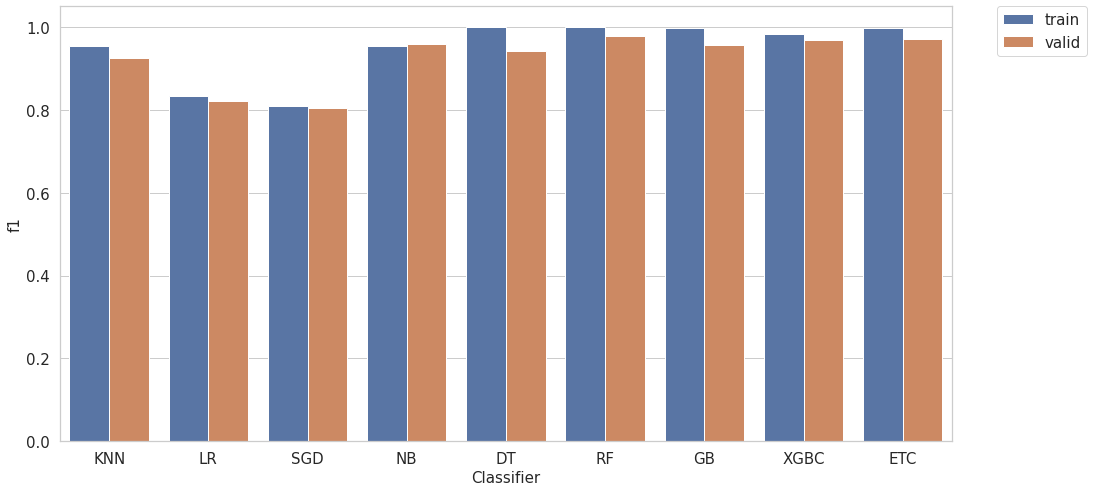

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'f1_score', hue = 'data_set',data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('f1', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [ ]:
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(confmat):

    # this creates the matplotlib graph to make the confmat look nicer
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
       
    # change the labels
    ax.set_xticklabels(['']+['Baseline', 'Seizure'])
    ax.set_yticklabels(['']+['Baseline', 'Seizure'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ax.xaxis.set_label_position('top')

    plt.tight_layout()
    
    plt.show()

In [ ]:
# list of classifier names
classifier_names = ['Naive Bayes', 'Random FOrest', 
                    'Gradient Boosting', 'XGBC','ETC']

# list of classifiers
classifiers = [nb, random, gbc, xgbc, etc ]

# fit all the classifiers to the training data
#for classifier in classifiers:

Naive Bayes


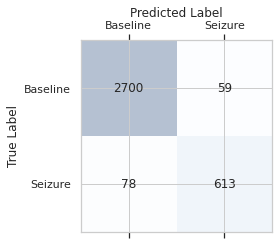

Random FOrest


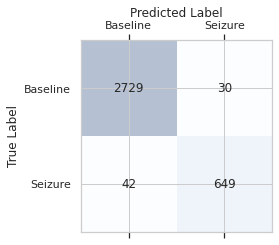

Gradient Boosting


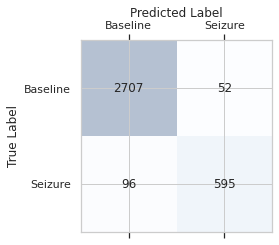

XGBC


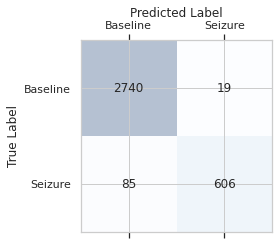

ETC


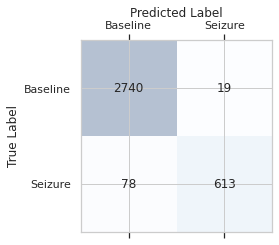

In [ ]:
for i, classifier in enumerate(classifiers):
  print(classifier_names[i])

  predictions = classifier.predict(X_test_tf)

  confmat = confusion_matrix(y_true=y_test, y_pred=predictions)

  pretty_confusion_matrix(confmat)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
for i, classifier in enumerate(classifiers):
  predictions = classifier.predict(X_test_tf)

  classifier_score_df = pd.DataFrame(
      classification_report(y_test, 
                            predictions,
                            target_names=['Baseline', 'Seizure'],
                            digits=2, 
                            output_dict=True))
  
  classifier_score_df.index.name = 'Metric'
  classifier_score_df['Classifier'] = classifier_names[i]
  classifier_score_df = classifier_score_df.set_index('Classifier', append=True)
  
  if i == 0:
    all_scores = classifier_score_df

  else:
    all_scores = pd.concat([all_scores, classifier_score_df])
        
all_scores.sort_index()

Baseline     Seizure  accuracy    macro avg  \
Metric    Classifier                                                          
f1-score  ETC                   0.982607    0.926682  0.971884     0.954644   
          Gradient Boosting     0.973391    0.889387  0.957101     0.931389   
          Naive Bayes           0.975257    0.899486  0.960290     0.937372   
          Random FOrest         0.986980    0.947445  0.979130     0.967213   
          XGBC                  0.981375    0.920973  0.969855     0.951174   
precision ETC                   0.972321    0.969937  0.971884     0.971129   
          Gradient Boosting     0.965751    0.919629  0.957101     0.942690   
          Naive Bayes           0.971922    0.912202  0.960290     0.942062   
          Random FOrest         0.984843    0.955817  0.979130     0.970330   
          XGBC                  0.969912    0.969600  0.969855     0.969756   
recall    ETC                   0.993113    0.887120  0.971884     0.940117   
          Gradient Boosting     0.981153    0.861071  0.957101     0.921112   
          Naive Bayes           0.978615    0.887120  0.960290     0.932868   
          Random FOrest         0.989126    0.939219  0.979130     0.964173   
          XGBC                  0.993113    0.876990  0.969855     0.935052   
support   ETC                2759.000000  691.000000  0.971884  3450.000000   
          Gradient Boosting  2759.000000  691.000000  0.957101  3450.000000   
          Naive Bayes        2759.000000  691.000000  0.960290  3450.000000   
          Random FOrest      2759.000000  691.000000  0.979130  3450.000000   
          XGBC               2759.000000  691.000000  0.969855  3450.000000   

                             weighted avg  
Metric    Classifier                       
f1-score  ETC                    0.971406  
          Gradient Boosting      0.956566  
          Naive Bayes            0.960081  
          Random FOrest          0.979062  
          XGBC                   0.969277  
precision ETC                    0.971843  
          Gradient Boosting      0.956513  
          Naive Bayes            0.959961  
          Random FOrest          0.979029  
          XGBC                   0.969849  
recall    ETC                    0.971884  
          Gradient Boosting      0.957101  
          Naive Bayes            0.960290  
          Random FOrest          0.979130  
          XGBC                   0.969855  
support   ETC                 3450.000000  
          Gradient Boosting   3450.000000  
          Naive Bayes         3450.000000  
          Random FOrest       3450.000000  
          XGBC                3450.000000

Support refers to the number of actual occurrences of the class in the dataset.